In [2]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

## Step 1: Read in hold out data, scalers, and best model

In [35]:
df2 = pd.read_csv('holdout_data.csv', index_col=0)

In [42]:
#load final model
final_model = pickle.load( open( "model.pickle", "rb" ) )

final_model

RandomForestClassifier(class_weight={0: 20, 1: 80}, max_depth=3,
                       min_samples_leaf=6, n_estimators=150, oob_score=True,
                       random_state=100, verbose=1)

In [ ]:
# # load model features
# with open('model_features.pickle', 'rb') as filename:
#     model_features = pickle.load(filename)

# model_features

In [ ]:
# load scaler

# scaler = pickle.load( open( "scaler.pickle", "rb" ) )

## Step 2: Feature Engineering for holdout set

In [4]:
df2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
5501,180000,2,2,1,44,0,0,0,0,0,0,161186,167080,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
28857,130000,2,2,1,48,-2,-2,-2,-2,-2,-2,0,1240,1487,1279,749,440,1240,1487,1279,749,440,849
11272,60000,2,1,1,43,-1,3,2,0,0,-1,495,330,495,330,165,340,0,330,0,0,340,0
8206,240000,1,1,1,42,0,0,0,0,0,0,72339,91045,91027,51508,51127,0,20000,2213,1030,1023,6790,10893
6362,100000,2,2,1,28,2,0,0,0,0,2,73073,74739,70844,63924,57326,59654,3500,3003,1910,2400,3300,0


In [6]:
df2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000
mean,168773.496867,1.605253,1.846687,1.547394,35.598187,-0.024530,-0.148647,-0.184242,-0.238901,-0.285695,-0.301560,50525.839355,48560.471004,46926.253166,43064.382482,40326.482069,38622.084922,5770.558592,5791.498734,5126.006799,4925.374483,4600.617784,5120.189308
std,129395.268420,0.488829,0.785679,0.523629,9.158158,1.125669,1.194837,1.190707,1.151804,1.112400,1.137123,71074.674479,68781.989905,67619.936997,63507.059007,60434.277860,58895.475662,16367.760159,18196.409533,15855.567749,15029.726455,14568.590653,17429.232182
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-154973.000000,-33350.000000,-24702.000000,-170000.000000,-20753.000000,-73895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3658.000000,3016.000000,2863.000000,2342.000000,1876.000000,1315.000000,993.000000,856.000000,390.000000,316.000000,272.000000,192.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22358.000000,21465.000000,20344.000000,19097.000000,18378.000000,17352.000000,2122.000000,2042.000000,1800.000000,1551.000000,1579.000000,1502.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67722.000000,64697.000000,60185.000000,54589.000000,50149.000000,49104.000000,5057.000000,5000.000000,4664.000000,4200.000000,4000.000000,4000.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,604019.000000,605943.000000,578971.000000,518741.000000,587067.000000,527566.000000,405016.000000,401003.000000,380478.000000,497000.000000,426529.000000,377000.000000


In [7]:
df2[df2['X1'] == "LIMIT_BAL"]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23


In [36]:
df2["X3"].replace([0, 5, 6], 4, inplace = True) # 0,5,6 not described in data description
df2["X4"].replace(0, 3, inplace = True) # 0 not describe in data description
df2['X6'].replace([-2,-1], 0, inplace = True)
df2['X7'].replace([-2,-1], 0, inplace = True)
df2['X8'].replace([-2,-1], 0, inplace = True)
df2['X9'].replace([-2,-1], 0, inplace = True)
df2['X10'].replace([-2,-1], 0, inplace = True)
df2['X11'].replace([-2,-1], 0, inplace = True)

In [37]:

df2['avg_billamt'] = (df2['X12'] + df2['X13'] + df2['X14'] + df2['X15'] + df2['X16'] + df2['X17'])/6

conditions = [
    df2['avg_billamt'] <= 0,
    (df2['avg_billamt'] > 0) & (df2['avg_billamt'] <= 5000),
     (df2['avg_billamt'] > 5000) & (df2['avg_billamt'] <= 21000),
     (df2['avg_billamt'] > 21000) & (df2['avg_billamt'] <= 57000),
     df2['avg_billamt'] > 57000
     ]

choices = [
    0,
    1,
    2,
    3,
    4
]

df2['billamt_status'] = np.select(conditions, choices)

df2['bal_change'] = (df2['X12']- df2['X17'])

billamt_X = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']

df2.drop(columns = billamt_X, axis = 1, inplace= True )

dummy1 = pd.get_dummies(df2['X2'],drop_first= True) # dummy for sex 1 is male and 2 is female
dummy2 = pd.get_dummies(df2['X3'], drop_first = True) #dummy for education 1 for grad school, 2 for University, 3 for High School and 4 for others
dummy3 = pd.get_dummies(df2['X4'], drop_first=True ) #dummy for marriage 1 = married; 2 = single; 3 = others
dummy4 = pd.get_dummies(df2['billamt_status'], drop_first = True) #for avg bill amount of vars from X12 to X17

dummy_feats = ['X2', 'X3', 'X4', 'avg_billamt', 'billamt_status'] #avg_billamt used to build billamt status
df2.drop(columns = dummy_feats, axis = 1, inplace= True )


In [38]:
data1 = df2[['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']]

from sklearn.preprocessing import PolynomialFeatures

#Instantiating polynomial features object
poly = PolynomialFeatures(degree=2, include_bias=False)

# applying polynomial feature object to data
poly_data = poly.fit_transform(data1)

#assigning feature names from main dataframe
poly_columns = poly.get_feature_names(data1.columns)

#converting array to dataframe
df_poly = pd.DataFrame(poly_data, columns = poly_columns, index=data1.index)

df_poly.drop(columns =['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23'], axis=1, inplace = True)

df3 = pd.concat([df2, df_poly, dummy1, dummy2, dummy3, dummy4 ], axis = 1)

In [39]:
df3.shape

(7501, 130)

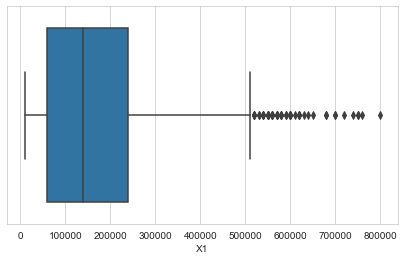

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df2['X1'],linewidth=1.5);

In [30]:
df2[df2['X23'] >= 500000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23


In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

scaler = MinMaxScaler()  
scaler.fit(df3)

df3_scaled = scaler.transform(df3)  


## Step 3: Predict the holdout set

In [48]:
holdout_pred = final_model.predict(df3_scaled)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


In [53]:
print(sum(holdout_pred))
print(len(holdout_pred)-sum(holdout_pred))
print((len(holdout_pred)-sum(holdout_pred))/len(holdout_pred))

1951
5550
0.739901346487135


## Step 4: Export your predictions

In [54]:
pd.DataFrame(holdout_pred).to_csv('predictions_Lhamu_Tsering.csv')